In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [54]:
df= pd.read_csv("winequality-red.csv")

In [55]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [57]:
df.shape

(1599, 12)

In [58]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [59]:
X=df.drop("quality",axis=1)
y=df["quality"]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=15)

In [61]:
X_train.shape

(1119, 11)

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
tree_model=DecisionTreeRegressor(criterion="squared_error", max_depth=3,random_state=0)
tree_model.fit(X_train, y_train)
y_pred= tree_model.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("mse:" ,mean_squared_error(y_test,y_pred))
print("mae:" ,mean_absolute_error(y_test,y_pred))
print("r2:" ,r2_score(y_test,y_pred))

mse: 0.47099449117251985
mae: 0.5412852199739052
r2: 0.282275121258839


In [65]:
#hyper parameter tuning

In [66]:
param = {
    "criterion": ["squared_error","friedman_mse","absolute_error","possion"],
    "splitter": ["best", "random"],
    "max_depth" : [1, 2, 3, 4, 5, 15, None],
    "max_features": ["sqrt", "log2"] 
}

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
grid= GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param,cv=5, scoring="r2")

In [69]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'possion'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [70]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [71]:
y_pred=grid.predict(X_test)

In [72]:
print("mse:" ,mean_squared_error(y_test,y_pred))
print("mae:" ,mean_absolute_error(y_test,y_pred))
print("r2:" ,r2_score(y_test,y_pred))

mse: 0.4791151943339681
mae: 0.5399454588025089
r2: 0.26990038906752656


In [73]:
tree_model_new= DecisionTreeRegressor(criterion="friedman_mse", max_depth=5, max_features="sqrt", splitter="best")

In [74]:
tree_model_new.fit(X_train, y_train)
y_pred_tree=tree_model_new.predict(X_test)
print("mse:" ,mean_squared_error(y_test,y_pred))
print("mae:" ,mean_absolute_error(y_test,y_pred))
print("r2:" ,r2_score(y_test,y_pred))

mse: 0.4791151943339681
mae: 0.5399454588025089
r2: 0.26990038906752656


In [75]:
from sklearn import tree

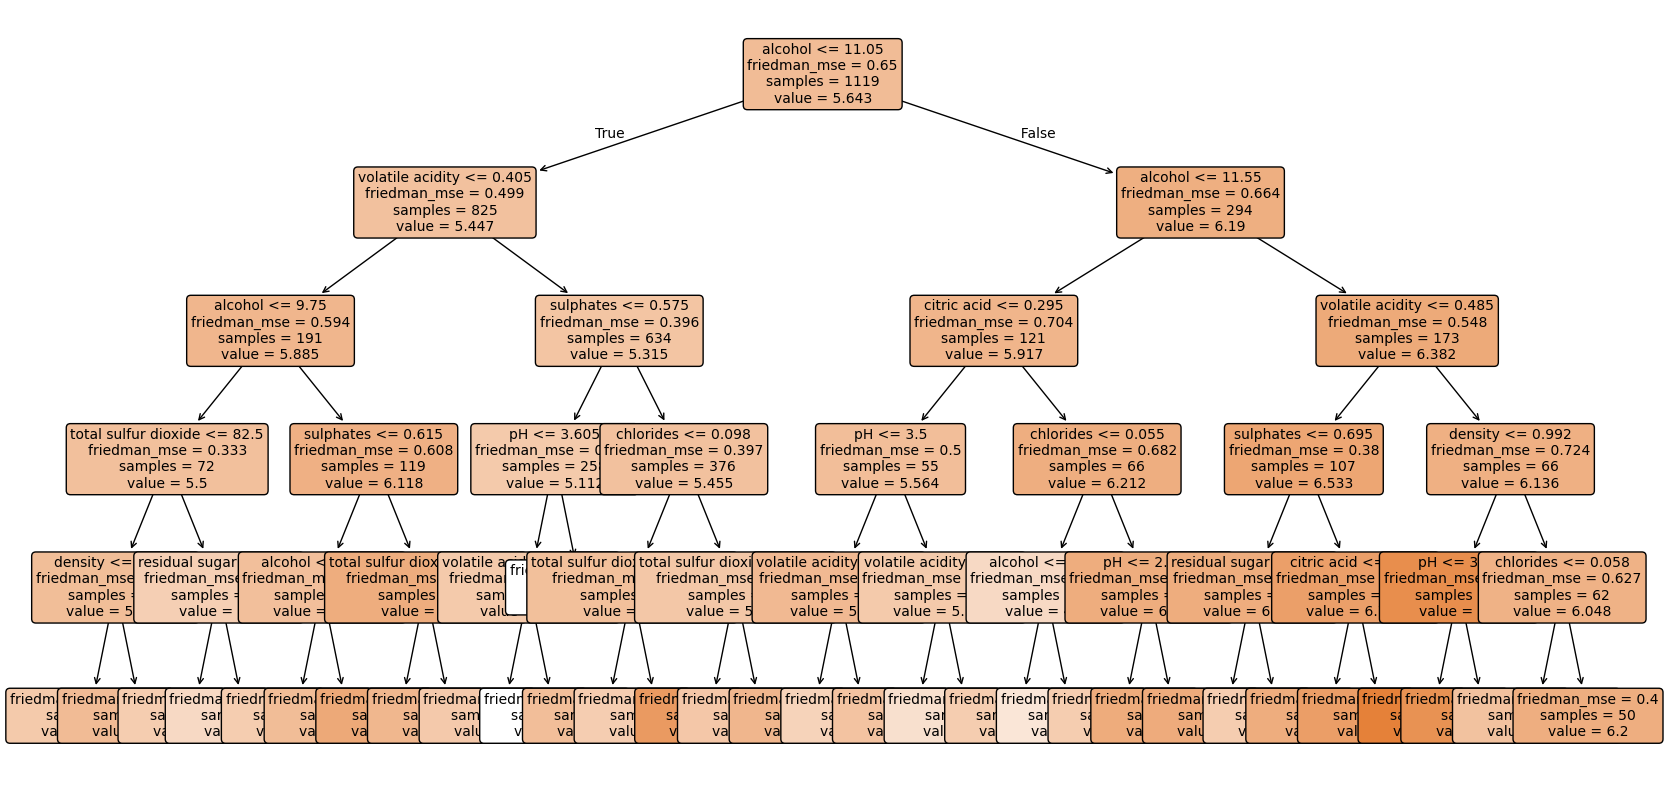

In [76]:
plt.figure(figsize=(20,10))
tree.plot_tree(
    tree_model_new,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [78]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [81]:
print("Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

Linear Regression
MSE: 0.4791151943339681
MAE: 0.5399454588025089
R2: 0.26990038906752656


In [82]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)

In [89]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

In [90]:
print("Polynomial Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

Polynomial Regression
MSE: 0.4791151943339681
MAE: 0.5399454588025089
R2: 0.26990038906752656


In [91]:
from sklearn.svm import SVR

In [92]:
svr = SVR(kernel="rbf", C=10, gamma=0.1) 
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

In [93]:
print("SVR Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

SVR Regression
MSE: 0.4791151943339681
MAE: 0.5399454588025089
R2: 0.26990038906752656


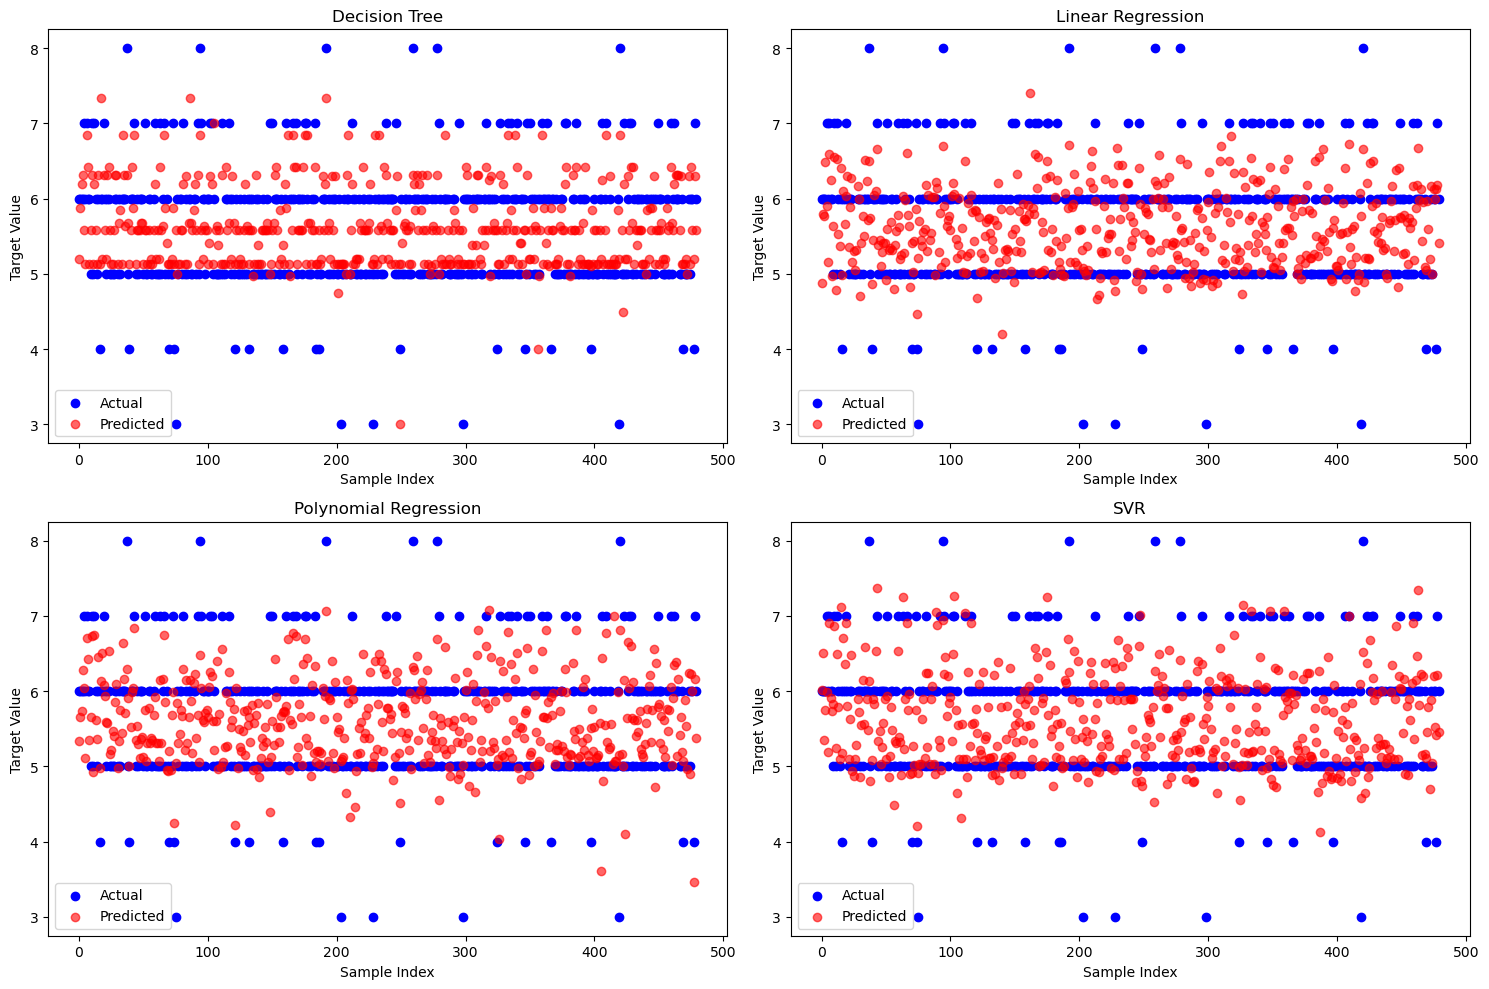

In [94]:
plt.figure(figsize=(15, 10))

models = ["Decision Tree", "Linear Regression", "Polynomial Regression", "SVR"]
predictions = [y_pred_tree, y_pred_lin, y_pred_poly, y_pred_svr]

for i, (model_name, y_pred) in enumerate(zip(models, predictions), 1):
    plt.subplot(2, 2, i)
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
    plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.6, label='Predicted')
    plt.title(model_name)
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.legend()

plt.tight_layout()
plt.show()